## Analise Exploratória

#### Importando as bibliotecas e os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
sample_submission = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


### Identificando Nulos e tratando-os

In [3]:
print(train.isnull().sum())

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64


In [4]:
print(test.isnull().sum())

track_unique_id     0
track_id            0
artists             1
album_name          1
track_name          1
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [5]:
print(test[test['artists'].isnull()])

      track_unique_id                track_id artists album_name track_name  \
7668            65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

      duration_ms  explicit  danceability  energy  key  loudness  mode  \
7668            0     False         0.501   0.583    7     -9.46     0   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
7668       0.0605          0.69           0.00396    0.0747    0.734  138.391   

      time_signature track_genre  
7668               4       k-pop  


In [6]:
# Iniucialmente pensei em fazer isso, mas como não pode ter menos linhas do que o sample_submission, vou tomar outra decisão.

# test = test.drop(7668) # Os tres nulos identificados estao nessa linha, como temos um df bem grande, decidir dropar essa linha.
# test = test.reset_index(drop=True)
# print(test.isnull().sum())

In [7]:
# Preenchendo valores nulos com a moda das colunas correspondentes
test['artists'].fillna(test['artists'].mode()[0], inplace=True)
test['album_name'].fillna(test['album_name'].mode()[0], inplace=True)
test['track_name'].fillna(test['track_name'].mode()[0], inplace=True)

print(test.isnull().sum())

track_unique_id     0
track_id            0
artists             0
album_name          0
track_name          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


C:\Users\Inteli\AppData\Local\Temp\ipykernel_18352\3810099013.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['artists'].fillna(test['artists'].mode()[0], inplace=True)
C:\Users\Inteli\AppData\Local\Temp\ipykernel_18352\3810099013.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [8]:
# Identificando duplicatas
duplicated_train = train[train.duplicated()]
print(f"Duplicatas em train: {duplicated_train.shape[0]}")
duplicated_test = test[test.duplicated()]
print(f"Duplicatas em test: {duplicated_test.shape[0]}")

Duplicatas em train: 0
Duplicatas em test: 0


###  Identificação das variavies categóricas e numéricas e fazendo sua codificação

In [9]:
train.head() # overview do dataset

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


In [10]:
categorical_cols = train.select_dtypes(include=[object]).columns

for col in categorical_cols:
    print(f"Valores únicos em {col}: {train[col].nunique()}")    

# Verificando as categóricas e vendendo a quantidade de vezes que aparecem

Valores únicos em track_id: 66720
Valores únicos em artists: 25775
Valores únicos em album_name: 37315
Valores únicos em track_name: 55767
Valores únicos em track_genre: 114


In [11]:
train = train.drop(columns=['track_id','track_unique_id', 'album_name', 'track_name']) # Não faz sentido manter essas colunas, pois por se tratarem de nomes e IDs, uma vez que são únicos, não agregam informação relevante para o modelo. Além disso, não há ponto em fazer uma codificação dessas variáveis, pois não há uma relação de ordem entre elas.
test = test.drop(columns=['track_id', 'album_name', 'track_name'])

In [12]:
label_encoders = {}
label_columns = ['artists'] # como o artista pode ter bastante repetições de musicas e causar impacto direto na popularidade, decidi usar label encode pela grande quantidade de artistas diferentes
for col in label_columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [13]:
train= pd.get_dummies(train, columns=['track_genre'], drop_first=True) 
test= pd.get_dummies(test, columns=['track_genre'], drop_first=True) # Como o genero da musica tem uma alta relação com a popularidade, decidi fazer um one hot encode, pois não há uma relação de ordem entre os generos e existe uma quantidade OK de generos diferentes.

In [14]:
train.head()

,artists,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,13481,211533,False,0.305,0.8490,9,-10.795,1,0.0549,0.000058,...,False,False,False,False,False,False,False,False,False,False
1,7754,196000,False,0.287,0.1900,7,-12.030,0,0.0370,0.930000,...,False,False,False,False,False,False,False,False,False,False
2,21526,216506,False,0.583,0.5090,1,-9.661,1,0.0362,0.777000,...,False,False,False,False,False,False,False,False,False,False
3,8029,218346,False,0.163,0.0368,8,-23.149,1,0.0472,0.991000,...,False,False,False,False,False,False,False,False,False,False
4,20008,173160,False,0.647,0.9210,2,-7.294,1,0.1850,0.000939,...,False,False,False,False,False,True,False,False,False,False


### Exploração e Visualização de Dados

In [15]:
train.describe()

,artists,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,12892.093233,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,7442.758239,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6502.000000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,12793.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,19364.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,25774.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


Como eu fiz One-Hot Encode, não é viavel plotar uma matriz de correlação, então treinarei um modelo de Random Forest apenas para verificar importância das features.

#### Submodelo RandomForest

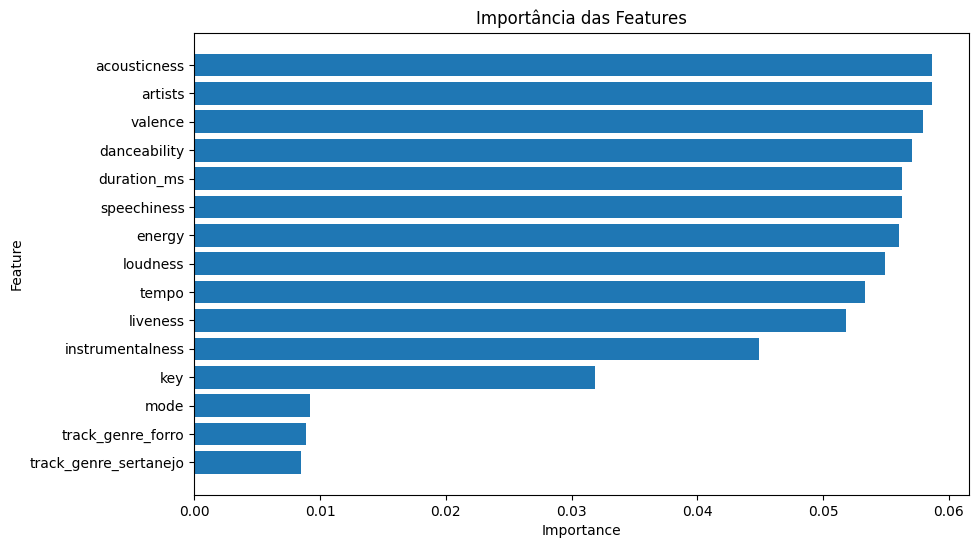

                   feature  importance
9             acousticness    0.058683
0                  artists    0.058658
12                 valence    0.057967
3             danceability    0.057037
1              duration_ms    0.056282
8              speechiness    0.056238
4                   energy    0.056027
6                 loudness    0.054914
13                   tempo    0.053350
11                liveness    0.051830
10        instrumentalness    0.044892
5                      key    0.031864
7                     mode    0.009236
49       track_genre_forro    0.008867
111  track_genre_sertanejo    0.008485
54      track_genre_gospel    0.007559
91      track_genre_pagode    0.007552
122      track_genre_tango    0.007265
88         track_genre_mpb    0.007229
69      track_genre_indian    0.007182


In [16]:
X = train.drop(columns=['popularity_target'])
y = train['popularity_target']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(feature_importance_df['feature'].head(15), feature_importance_df['importance'].head(15))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance_df.head(20))


In [17]:
print(feature_importance_df.head(30))

                   feature  importance
9             acousticness    0.058683
0                  artists    0.058658
12                 valence    0.057967
3             danceability    0.057037
1              duration_ms    0.056282
8              speechiness    0.056238
4                   energy    0.056027
6                 loudness    0.054914
13                   tempo    0.053350
11                liveness    0.051830
10        instrumentalness    0.044892
5                      key    0.031864
7                     mode    0.009236
49       track_genre_forro    0.008867
111  track_genre_sertanejo    0.008485
54      track_genre_gospel    0.007559
91      track_genre_pagode    0.007552
122      track_genre_tango    0.007265
88         track_genre_mpb    0.007229
69      track_genre_indian    0.007182
126    track_genre_turkish    0.007169
23      track_genre_brazil    0.007099
107    track_genre_romance    0.007075
108        track_genre_sad    0.006947
95    track_genre_pop-fil

In [18]:
print(feature_importance_df.tail(50))

                           feature  importance
117               track_genre_soul    0.001953
46          track_genre_electronic    0.001939
98          track_genre_psych-rock    0.001836
104               track_genre_rock    0.001814
20         track_genre_black-metal    0.001796
94                 track_genre_pop    0.001758
118            track_genre_spanish    0.001754
50              track_genre_french    0.001730
106         track_genre_rockabilly    0.001725
41       track_genre_drum-and-bass    0.001721
34               track_genre_dance    0.001695
85               track_genre_metal    0.001644
28            track_genre_children    0.001601
119              track_genre_study    0.001596
31                track_genre_club    0.001586
123             track_genre_techno    0.001581
52              track_genre_garage    0.001560
86           track_genre_metalcore    0.001559
78                track_genre_jazz    0.001556
72          track_genre_industrial    0.001551
53           

Dessa forma, conclui que todas as colunas presentes tem relevancia pro modelo, por sinal, é claro como generos diferentes tem impactos diferentes.

## Hipóteses

### Hipótese 1:

Músicas com alta "acousticness" tendem a ser menos populares, Músicas com altos valores de acousticness, ou seja, mais acústicas, podem ser menos populares, já que o público mainstream geralmente prefere músicas com maior uso de elementos eletrônicos ou amplificados. Esta característica aparece como a mais importante no modelo, sugerindo que a sonoridade mais orgânica pode ter um impacto inverso na popularidade.

C:\Users\Inteli\AppData\Local\Temp\ipykernel_18352\3003546664.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acousticness_popularity_counts = train.groupby(['acousticness_binned', 'popularity_target']).size().unstack(fill_value=0)


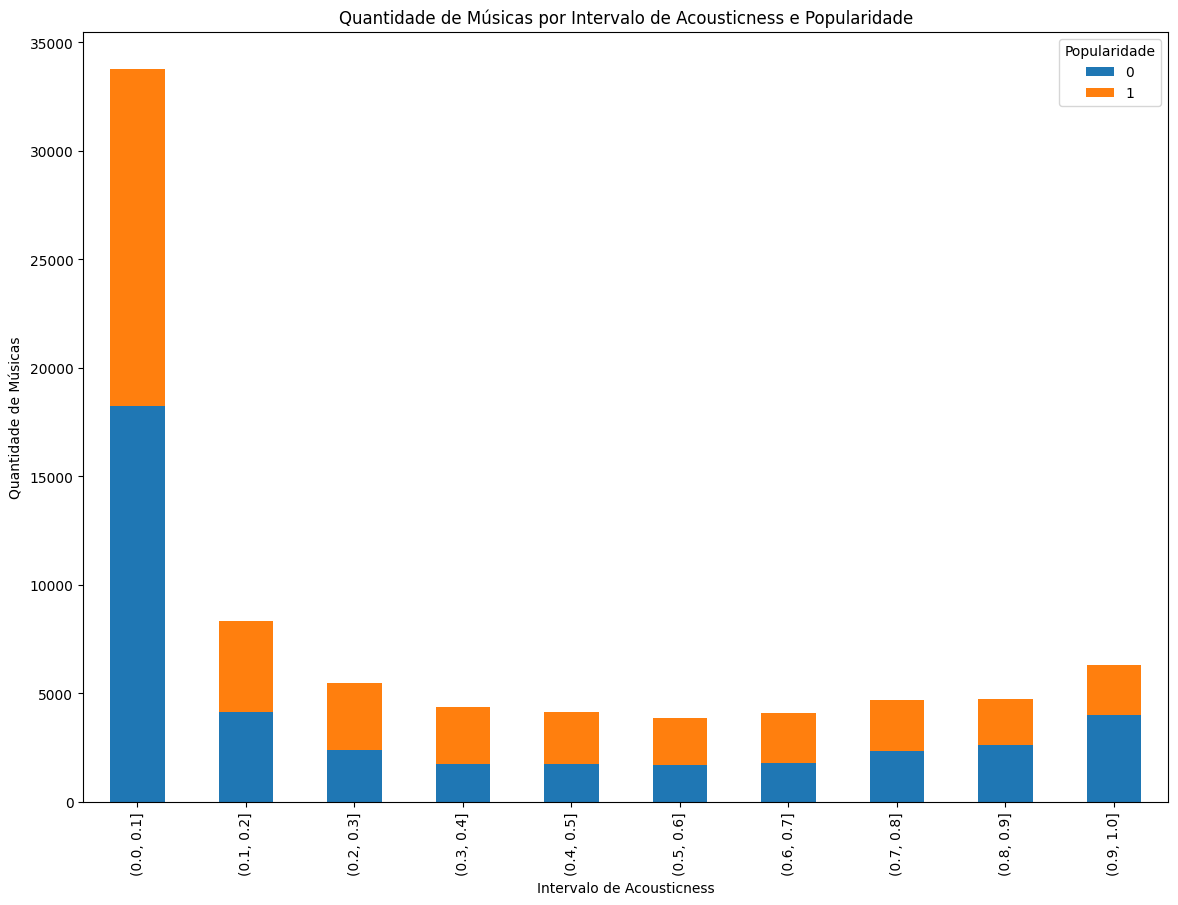

In [19]:
bins = np.linspace(0, 1, 11)
train['acousticness_binned'] = pd.cut(train['acousticness'], bins)

acousticness_popularity_counts = train.groupby(['acousticness_binned', 'popularity_target']).size().unstack(fill_value=0)

acousticness_popularity_counts.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Quantidade de Músicas por Intervalo de Acousticness e Popularidade')
plt.xlabel('Intervalo de Acousticness')
plt.ylabel('Quantidade de Músicas')
plt.legend(title='Popularidade')
plt.show()

Apesar da primeira hipótese ser promissora, percebemos que apesar do modelo de teste encontrar importância nessa feature, não há uma correlação tão clara entre a popularidade e a accousticness individualmente, pois para cada um dos intervalos de accousticness a popularidade tende a ser 50% true e 50% false. Contudo, ao olhar com atenção é possivel notar que para as músicas no intervalo entre 0.8 a 1.0 de acousticness, o gráfico mostra que a maioria das músicas tiveram popularidade como 0, então é um indício de que a hipótese pode estar concreta, porém pela falta de indícios em outros intervalos, ela ainda não pode ser comprovada.

### Hipótese 2

A "valence" e a "energia" estão positivamente relacionadas à popularidade. Considerando que valence mede o quão positiva ou alegre uma música soa, e energy mede a intensidade e atividade percebida em uma música, ambas as variáveis são importantes para o modelo de teste, o que sugere que músicas com maior valência (mais felizes) e mais energia podem ter maior popularidade, pois essas características geralmente estão associadas a faixas de sucesso em gêneros como pop e dance music.

C:\Users\Inteli\AppData\Local\Temp\ipykernel_18352\4146353214.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acousticness_popularity_counts = train.groupby(['valence_binned', 'popularity_target']).size().unstack(fill_value=0)


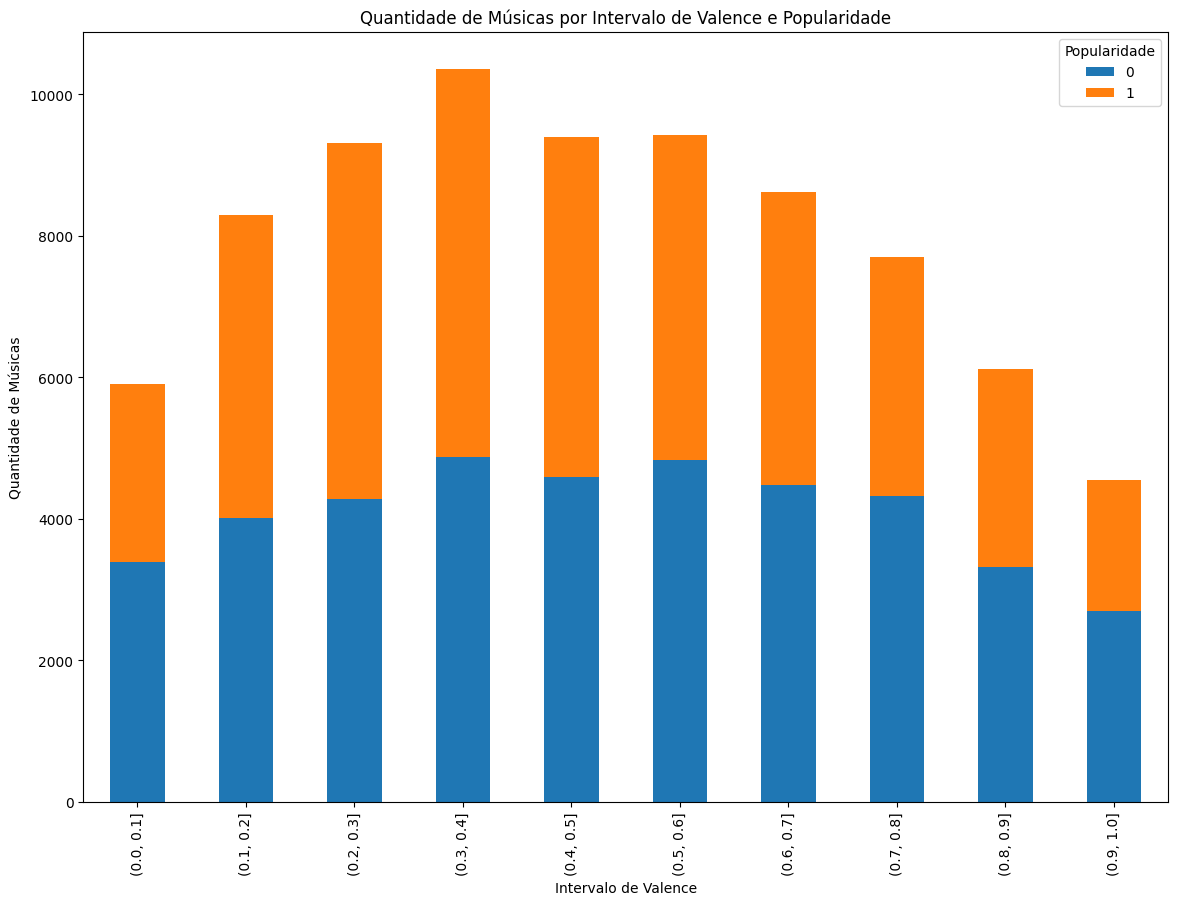

In [20]:
bins = np.linspace(0, 1, 11)
train['valence_binned'] = pd.cut(train['valence'], bins)

acousticness_popularity_counts = train.groupby(['valence_binned', 'popularity_target']).size().unstack(fill_value=0)

acousticness_popularity_counts.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Quantidade de Músicas por Intervalo de Valence e Popularidade')
plt.xlabel('Intervalo de Valence')
plt.ylabel('Quantidade de Músicas')
plt.legend(title='Popularidade')
plt.show()

C:\Users\Inteli\AppData\Local\Temp\ipykernel_18352\3840787736.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acousticness_popularity_counts = train.groupby(['energy_binned', 'popularity_target']).size().unstack(fill_value=0)


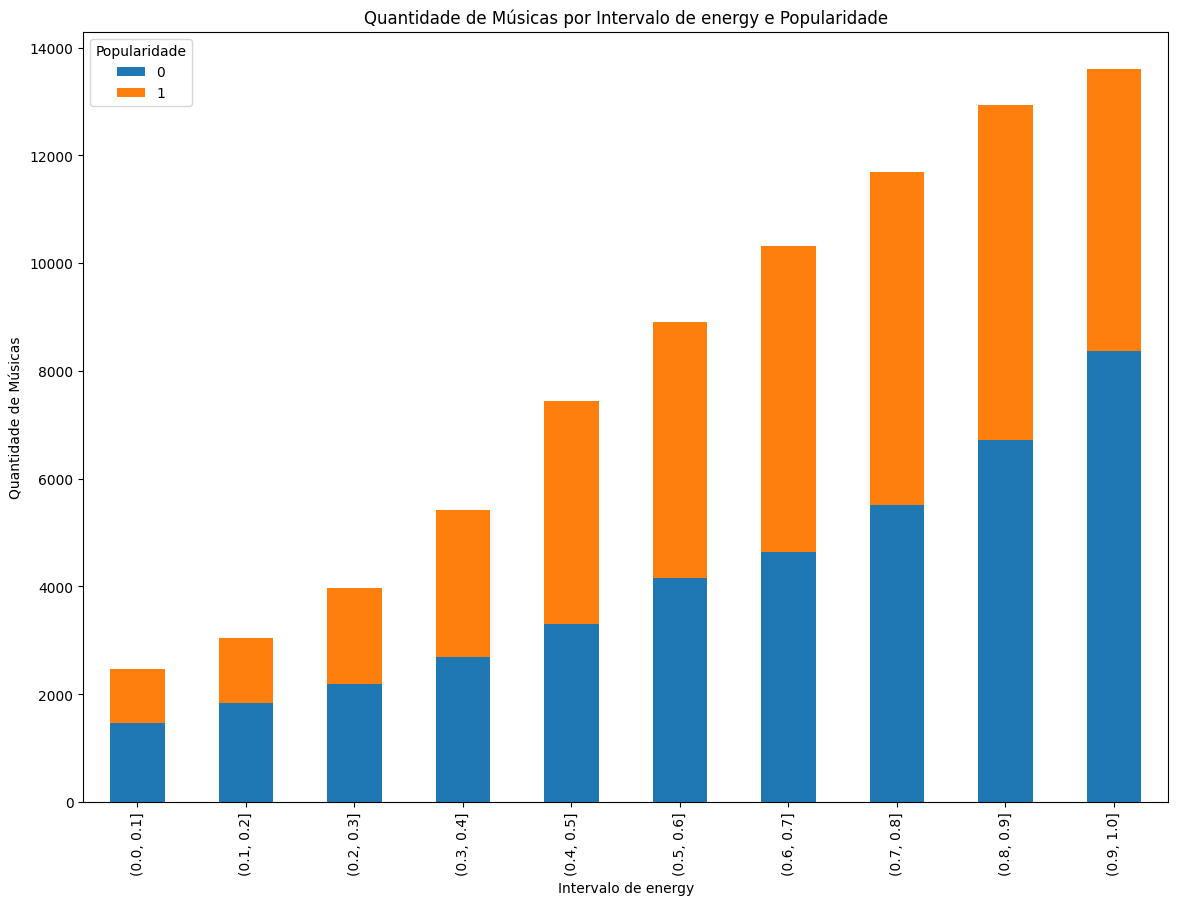

In [21]:
bins = np.linspace(0, 1, 11)
train['energy_binned'] = pd.cut(train['energy'], bins)

acousticness_popularity_counts = train.groupby(['energy_binned', 'popularity_target']).size().unstack(fill_value=0)

acousticness_popularity_counts.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Quantidade de Músicas por Intervalo de energy e Popularidade')
plt.xlabel('Intervalo de energy')
plt.ylabel('Quantidade de Músicas')
plt.legend(title='Popularidade')
plt.show()

Para a valence, não há uma relação clara e direta entre valence e popularidade. As músicas com valence moderado (0.4 a 0.6) são as mais comuns, mas a popularidade parece distribuída de forma mais uniforme ao longo de todos os intervalos, exceto nos extremos. Isso sugere que, embora a valência possa ser um fator na popularidade, não é o único determinante.

Para a energia, há uma relação mais clara entre energia e popularidade. Músicas com maior energia (entre 0.7 e 0.9) tendem a ser mais populares, confirmando a hipótese de que músicas mais intensas e enérgicas são geralmente mais bem-sucedidas. Contudo, no intervalo entre 0.9 e 1.0, as músicas tendem a ser menos populares, então é capaz que o público goste de energy de maneira não excessiva.

Portanto, a hipótese pode ser parcialmente confirmada. A energia tem uma relação mais evidente com a popularidade, enquanto a valence parece ter um impacto mais sutil ou menos direto.

### Hipótese 3

Músicas mais longas e com maior "danceability" têm maior probabilidade de serem populares. duration_ms (duração) e danceability estão entre as features mais importantes. Músicas com maior duração e maior facilidade de dança podem ser mais populares, pois longas faixas permitem uma maior experiência de imersão, e a dançabilidade facilita o apelo em festas, eventos sociais e playlists de entretenimento.

C:\Users\Inteli\AppData\Local\Temp\ipykernel_18352\3554528364.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acousticness_popularity_counts = train.groupby(['danceability_binned', 'popularity_target']).size().unstack(fill_value=0)


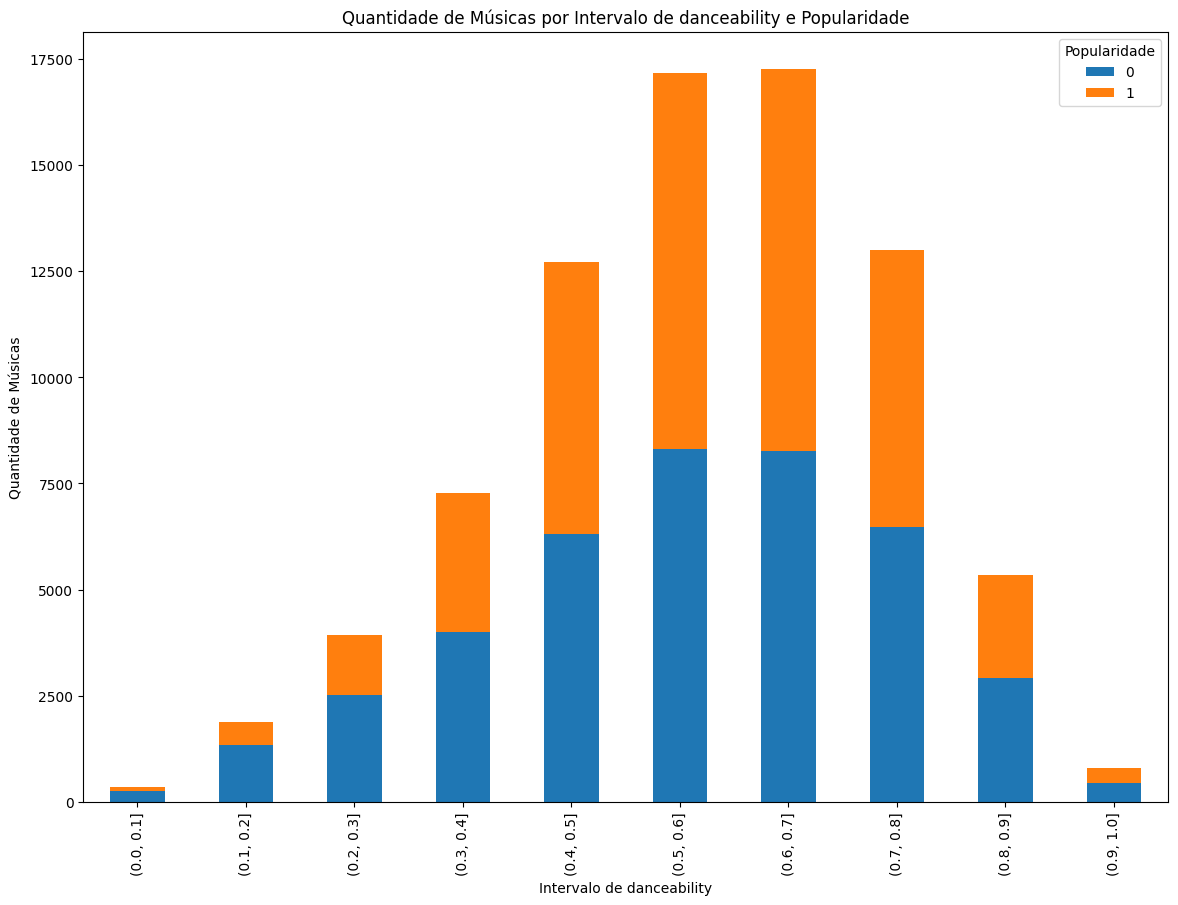

In [22]:
bins = np.linspace(0, 1, 11)
train['danceability_binned'] = pd.cut(train['danceability'], bins)

acousticness_popularity_counts = train.groupby(['danceability_binned', 'popularity_target']).size().unstack(fill_value=0)

acousticness_popularity_counts.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Quantidade de Músicas por Intervalo de danceability e Popularidade')
plt.xlabel('Intervalo de danceability')
plt.ylabel('Quantidade de Músicas')
plt.legend(title='Popularidade')
plt.show()

C:\Users\Inteli\AppData\Local\Temp\ipykernel_18352\404106605.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_popularity_counts = train.groupby(['duration_s_binned', 'popularity_target']).size().unstack(fill_value=0)


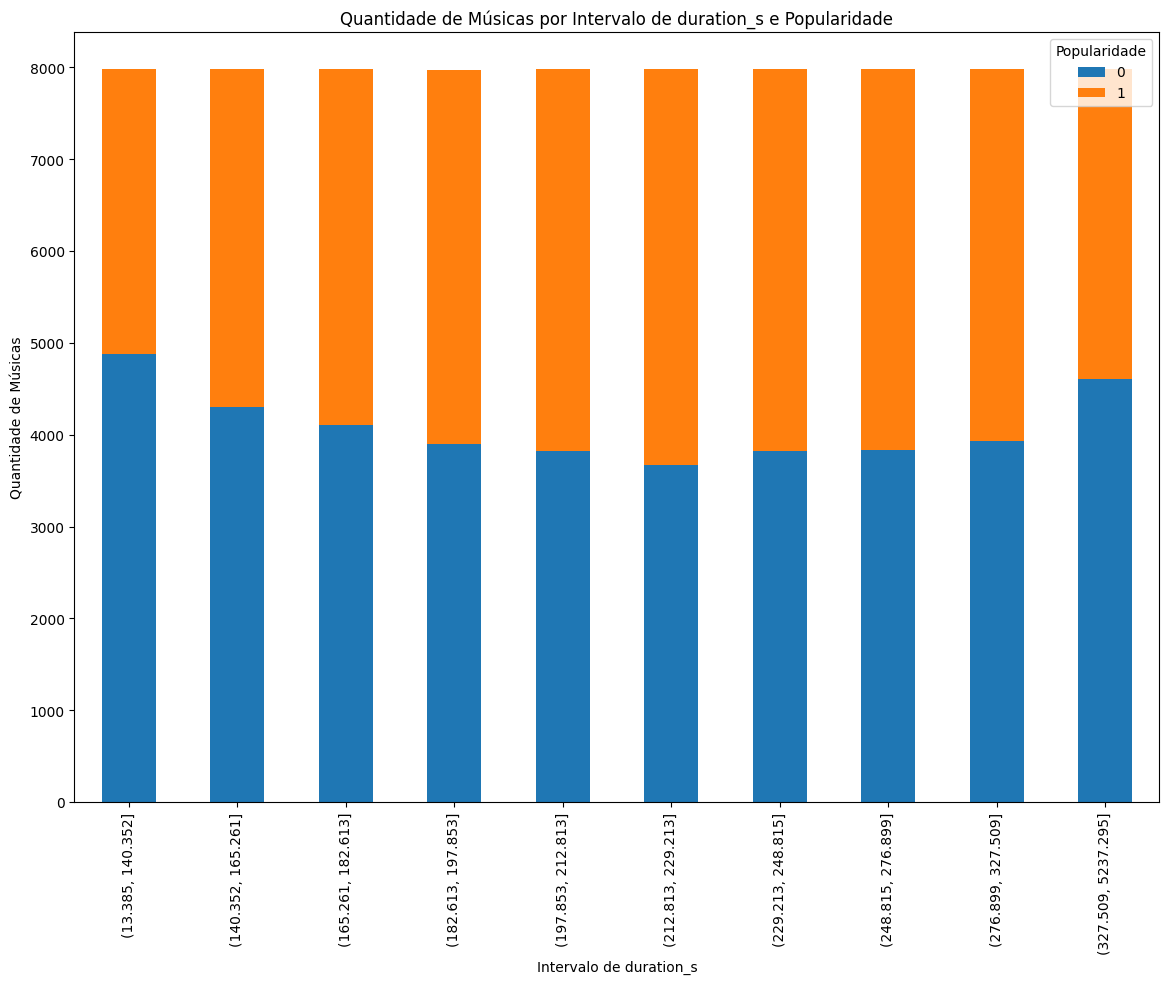

In [23]:
train['duration_s'] = train['duration_ms'] / 1000
train['duration_s_binned'] = pd.qcut(train['duration_s'], q=10)

duration_popularity_counts = train.groupby(['duration_s_binned', 'popularity_target']).size().unstack(fill_value=0)

duration_popularity_counts.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Quantidade de Músicas por Intervalo de duration_s e Popularidade')
plt.xlabel('Intervalo de duration_s')
plt.ylabel('Quantidade de Músicas')
plt.legend(title='Popularidade')
plt.show()

Com base na análise dos gráficos, podemos concluir que a "danceability" (dançabilidade) tem uma relação clara com a popularidade das músicas, já que as faixas com maior facilidade para dançar tendem a ser mais populares. No entanto, a duração das músicas não apresenta uma correlação tão evidente, com músicas de diversas durações alcançando popularidade. Embora faixas com durações entre 2.75 e 4 minutos demonstrem uma leve tendência a serem populares, a duração sozinha não parece ser um fator decisivo na popularidade, ao contrário da dançabilidade, que é um indicador mais relevante.

## Modelo

In [24]:
train = train.drop(columns=['acousticness_binned', 'valence_binned', 'energy_binned', 'danceability_binned', 'duration_s_binned',  'duration_s']) # Decidi dropar essas colunas, pois não agregam informação relevante para o modelo.

### Seleção de Features

Como foi provado pelo modelo de teste acima, todos as features tem importância, por conta disso, a primeiro momento pretendo manter todas elas. Mesmo que as hipóteses tenham apontado algumas variáveis óbivas, ela não descartou nenhuma variável, apenas mostrou que não existem relações tão claras ao olho humano em algumas das features.

### Construção e Avaliação do Modelo

Como já tinha imaginado anteriormente, decidi usar o Random Forest, pois é um modelo que lida bem com variáveis numéricas e categóricas e é rápido e prático. Pra ver se era um bom modelo a investir, decidi treinar sem nenhum finetuning prévio.

In [25]:
X = train.drop(columns=['popularity_target'])  # Já dropei track_unique_id no treino
y = train['popularity_target']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_val)

print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
print("Classification Report:\n", classification_report(y_val, y_val_pred))



Accuracy: 0.8387218045112782
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      8247
           1       0.83      0.83      0.83      7713

    accuracy                           0.84     15960
   macro avg       0.84      0.84      0.84     15960
weighted avg       0.84      0.84      0.84     15960



Sabendo agora que esse é um modelo promissor, por conta da acurácia alcançada, decidi rodar agora um finetuning utilizando Randomized Search para agilizar o processo.

In [26]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  
    'max_depth': [10, 20, 30, 40, None],        
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 4],              
    'max_features': ['auto', 'sqrt', 'log2']  
}

rf_model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                   n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print(f"Melhores hiperparâmetros: {random_search.best_params_}")

# Avaliar o modelo com os melhores hiperparâmetros no conjunto de validação
best_rf_model = random_search.best_estimator_
y_val_pred = best_rf_model.predict(X_val)

# Avaliar a acurácia e o desempenho
print(f"Accuracy com hiperparâmetros ajustados: {accuracy_score(y_val, y_val_pred)}")
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

Melhores hiperparâmetros: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Accuracy com hiperparâmetros ajustados: 0.8420426065162907
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      8247
           1       0.83      0.84      0.84      7713

    accuracy                           0.84     15960
   macro avg       0.84      0.84      0.84     15960
weighted avg       0.84      0.84      0.84     15960



Pra avaliar melhor o modelo de maneira mais visual, decidi plotar uma matriz de confusão pra ajudar nesse processo

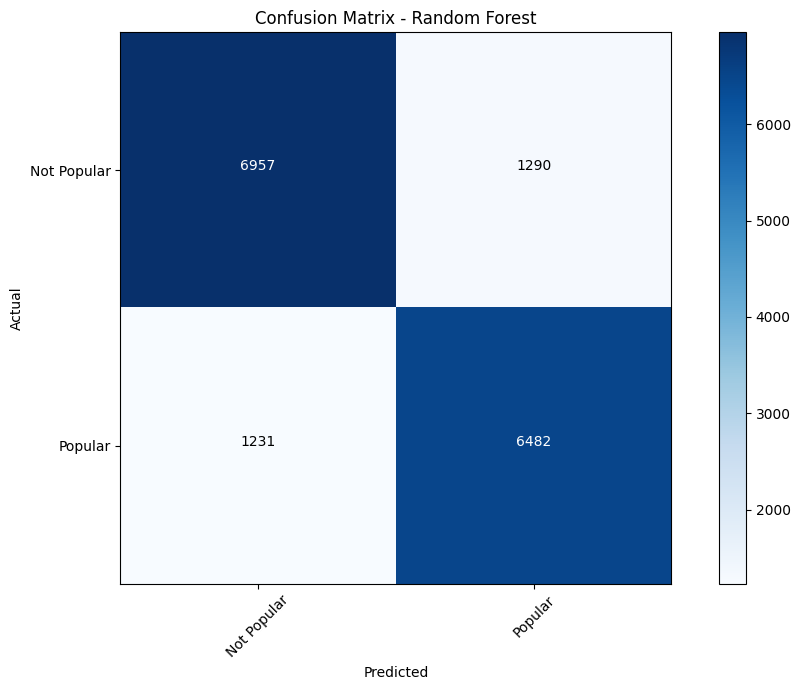

In [27]:
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plotando matriz de confusão
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Popular', 'Popular'], rotation=45)
plt.yticks(tick_marks, ['Not Popular', 'Popular'])

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Por fim, agora com um modelo treinado com finetuning, dou por completo a predição com uma acurácia final de 84%, o código abaixo gera uma tabela de predições com o df de test.

In [28]:
X_test = test.drop(columns=['track_unique_id'])  

test_predictions = best_rf_model.predict(X_test)
submission = pd.DataFrame({
    'track_unique_id': test['track_unique_id'],    
    'popularity': test_predictions
})

submission.to_csv('submission_random_forest.csv', index=False)

print("Previsões feitas e arquivo de submissão gerado!")

Previsões feitas e arquivo de submissão gerado!
